In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
all_students_features_trunc = pd.read_csv('all_students_features_trunc.csv', index_col = 0)
print(all_students_features_trunc.shape)
all_students_features_trunc.head()

C:\Users\yz685\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


(2891563, 13)


,employee_id_hash,is_greek,is_athlete,academic_career,academic_plan1,hd_notify_date,day_idx,positives_identified_on_this_day,infected_on_this_day,previous_infection,week_idx,biweek_idx,class_prevalence_on_this_day
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-26,23,0,0,0,0,NaN
1,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-27,43,0,0,0,0,NaN
2,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-28,57,0,0,0,0,NaN
3,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-29,55,0,0,0,0,NaN
4,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,ESAG-BS,NaN,2021-08-30,39,0,0,0,0,NaN


Text(0, 0.5, 'Number of students')

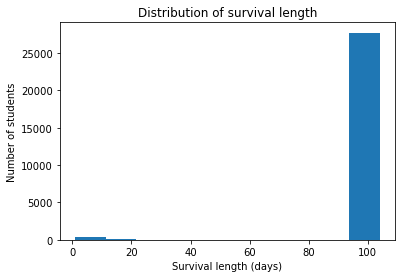

In [11]:
all_students_features_trunc.groupby(['employee_id_hash']).size().hist(grid=False, bins = 10)
plt.title('Distribution of survival length')
plt.xlabel('Survival length (days)')
plt.ylabel('Number of students')

In [12]:
all_students_features_trunc.groupby(['employee_id_hash']).size().value_counts(bins = 10)

(93.7, 104.0]    27708
(0.896, 11.3]      396
(11.3, 21.6]        81
(21.6, 31.9]        40
(83.4, 93.7]        20
(73.1, 83.4]        18
(42.2, 52.5]        17
(52.5, 62.8]        14
(62.8, 73.1]        11
(31.9, 42.2]         8
dtype: int64

In [25]:
len(all_students_features_trunc['employee_id_hash'].unique())

28313

In [30]:
all_students_features_trunc.groupby(['employee_id_hash']).size().value_counts()

104    27622
3         56
4         55
7         48
2         43
       ...  
83         1
70         1
44         1
57         1
31         1
Length: 74, dtype: int64

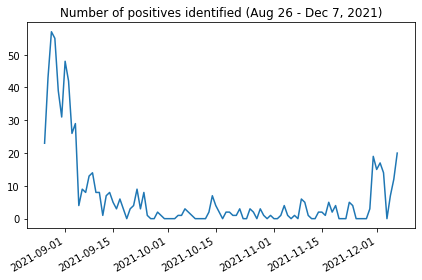

In [35]:
import matplotlib.dates as dates

idx = pd.date_range('2021-08-26', '2021-12-07')

fig, ax = plt.subplots()
ax.plot_date(idx.to_pydatetime(), all_students_features_trunc['positives_identified_on_this_day'][:104], '-')
plt.gcf().autofmt_xdate()
plt.title('Number of positives identified (Aug 26 - Dec 7, 2021)')

plt.tight_layout()
plt.show()



In [38]:
unique = all_students_features_trunc[['employee_id_hash', 'hd_notify_date', 'academic_career', 'is_greek', 'is_athlete']].drop_duplicates()
infections_by_day_involved = unique.loc[unique['hd_notify_date'].notnull()].groupby(['hd_notify_date']).size()


In [58]:
# distribution of academic_career across student-days
pd.concat(
    (all_students_features_trunc['academic_career'].value_counts(normalize = False),
    all_students_features_trunc['academic_career'].value_counts(normalize = True)),
    axis = 1
)

,academic_career,academic_career
UG,1238701,0.428385
GR,899232,0.310985
UG_G,318942,0.110301
GM,180414,0.062393
UG_A,105460,0.036472
LA,96506,0.033375
VM,52204,0.018054
EE,104,0.000036


In [59]:
# distribution of academic_career across students
pd.concat(
    (unique['academic_career'].value_counts(normalize = False),
    unique['academic_career'].value_counts(normalize = True)),
    axis = 1
)

,academic_career,academic_career
UG,12057,0.425847
GR,8675,0.306396
UG_G,3332,0.117684
GM,1744,0.061597
UG_A,1054,0.037227
LA,942,0.033271
VM,508,0.017942
EE,1,0.000035


In [40]:
unique['is_greek'].value_counts()

0    24971
1     3342
Name: is_greek, dtype: int64

In [41]:
unique['is_athlete'].value_counts()

0    27245
1     1068
Name: is_athlete, dtype: int64

In [51]:
# 10 individuals marked is_greek but are not undergraduates
unique[(unique['academic_career'] != 'UG_G') & (unique['is_greek'] == 1)]

,employee_id_hash,hd_notify_date,academic_career,is_greek,is_athlete
87048,0x07A584E59B2A531B0ACB31300460C803,NaN,GR,1,0
329472,0x1E23B1B44026258E210FE5F307E6D589,NaN,GR,1,0
358488,0x20E5282AA0F8D079FFCB3F7CC09EE781,NaN,GR,1,0
629200,0x3848B35E0D7172D858AFE6A214B1D1CC,NaN,GR,1,0
867568,0x4CEBAF9FDF0E384B261E2B672BC13AD0,NaN,LA,1,0
1521936,0x844C9003C4DE8BD791507E65A78279E7,NaN,GR,1,0
1633320,0x8E0BB67D49D84BB347F7823F24BD67F7,NaN,GR,1,0
2422784,0xD2CDEFD8260A21A4AF9E93345F157FFB,NaN,GR,1,0
2489760,0xD86AEEADF673F038EA6AC1ABF63997CC,NaN,GM,1,0
2832128,0xF5DD4014B797260D9007D6903AB7AE86,NaN,GR,1,0


In [52]:
# 14 individuals marked is_athlete but are not undergraduates
unique[(unique['academic_career'] != 'UG_A') & (unique['is_athlete'] == 1)]

,employee_id_hash,hd_notify_date,academic_career,is_greek,is_athlete
126464,0x0B421063A794F4EF7609C11BE94E34E8,NaN,GR,0,1
326664,0x1DF49F916C8E1A1B3B19206F88EB70D9,NaN,GR,0,1
1242904,0x6BF8468DDC4E05FE0034785E01966C87,NaN,GR,0,1
1275976,0x6E858785FB2B05A25C6562823BF69B97,NaN,GR,0,1
1803984,0x9D1F843D75D15AD205CF309F403E3B72,NaN,GM,0,1
1857336,0xA1A8433D25077822DF19813D988FE3EA,NaN,GR,0,1
1969968,0xAB9FC44872D51801DDC532695615D70E,NaN,GR,0,1
2120872,0xB898EBA91AC600DE4FC75F7CA183C39A,NaN,GR,0,1
2342704,0xCC0E0A0BCB132AB661707BF96070D430,NaN,GR,0,1
2401360,0xD10837274C965C660E8A5929F4D5E917,NaN,GR,0,1


In [60]:
# Now the question, can we trust the UG_G and UG_A categorizations?
# compare it with the class registration data, which is confirmed to have been saved in Oct 2021


In [61]:
class_registrations = pd.read_csv('older data/TAB_all_students_classes.csv')
class_registrations_students = class_registrations[['employee_id_hash', 'is_greek', 'is_athlete', 'academic_career']]
class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)

print(class_registrations.shape, class_registrations_students.shape)

(143873, 12) (28153, 4)


<ipython-input-61-946b93d6bb7f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  class_registrations_students.drop_duplicates(inplace=True, ignore_index = True)


In [63]:
class_registrations_students.head()

,employee_id_hash,is_greek,is_athlete,academic_career
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG
1,0x0006D10D9D2AF2FA09ED007D742633B1,0,0,GR
2,0x0019A7D6C123A2907CAECA890EE78500,0,0,UG
3,0x001E81320F975882CF328BE65817DD98,0,0,UG
4,0x00201F174069EA2D6081AF34AD4DDE41,0,0,GR


In [62]:
class_registrations_students['is_greek'].value_counts()


0    25448
1     2705
Name: is_greek, dtype: int64

In [ ]:
# Let's call the class registration data D1, which is confirmed to be pulled in October 2021
# Let's call the student-day data ("unique") D2, which has been updated a few times and might be pulled around March 2022

# We want to check whether the G/A information in D1 and D2 are consistent
# To do this, we first join the two tables on employee_id_hash

In [73]:
joined = pd.merge(class_registrations_students, unique, how = 'inner', on = 'employee_id_hash')
print(joined.shape)
joined.head()

(28149, 8)


,employee_id_hash,is_greek_x,is_athlete_x,academic_career_x,hd_notify_date,academic_career_y,is_greek_y,is_athlete_y
0,0x0001CEED0A3584312155FD3B695D2EB6,0,0,UG,NaN,UG,0,0
1,0x0006D10D9D2AF2FA09ED007D742633B1,0,0,GR,NaN,GR,0,0
2,0x0019A7D6C123A2907CAECA890EE78500,0,0,UG,NaN,UG,0,0
3,0x001E81320F975882CF328BE65817DD98,0,0,UG,NaN,UG,0,0
4,0x00201F174069EA2D6081AF34AD4DDE41,0,0,GR,NaN,GR,0,0


In [84]:
# for Greek membership:

print('D1 yes, D2 yes: ', joined[(joined['is_greek_x']==1) & (joined['academic_career_y'] == 'UG_G')].shape[0])
print('D1 yes, D2 no: ', joined[(joined['is_greek_x']==1) & (joined['academic_career_y'] != 'UG_G')].shape[0])
print('D1 no, D2 yes: ', joined[(joined['is_greek_x'] !=1) & (joined['academic_career_y'] == 'UG_G')].shape[0])

D1 yes, D2 yes:  2407
D1 yes, D2 no:  298
D1 no, D2 yes:  925


In [85]:
# for athlete membership:

print('D1 yes, D2 yes: ', joined[(joined['is_athlete_x']==1) & (joined['academic_career_y'] == 'UG_A')].shape[0])
print('D1 yes, D2 no: ', joined[(joined['is_athlete_x']==1) & (joined['academic_career_y'] != 'UG_A')].shape[0])
print('D1 no, D2 yes: ', joined[(joined['is_athlete_x'] !=1) & (joined['academic_career_y'] == 'UG_A')].shape[0])

D1 yes, D2 yes:  1035
D1 yes, D2 no:  104
D1 no, D2 yes:  19


In [ ]:
# It does seem like a big discrepancy, especially the 900+ people who very likely just joined Greek life in Spring 2022. 
# This is pretty strong evidence for D2 being spring 2022 data.

# So how do we use that? We should use D1 information to fix the student-day data
# This would be our next task


In [88]:
pd.merge(class_registrations_students, unique, how = 'outer', on = 'employee_id_hash')

,employee_id_hash,is_greek_x,is_athlete_x,academic_career_x,hd_notify_date,academic_career_y,is_greek_y,is_athlete_y
0,0x0001CEED0A3584312155FD3B695D2EB6,0.0,0.0,UG,NaN,UG,0.0,0.0
1,0x0006D10D9D2AF2FA09ED007D742633B1,0.0,0.0,GR,NaN,GR,0.0,0.0
2,0x0019A7D6C123A2907CAECA890EE78500,0.0,0.0,UG,NaN,UG,0.0,0.0
3,0x001E81320F975882CF328BE65817DD98,0.0,0.0,UG,NaN,UG,0.0,0.0
4,0x00201F174069EA2D6081AF34AD4DDE41,0.0,0.0,GR,NaN,GR,0.0,0.0
...,...,...,...,...,...,...,...,...
28312,0xFA2717D490A292D3199F6DC6D060761F,NaN,NaN,NaN,NaN,UG,0.0,0.0
28313,0xFD5CC1CC4C954413F7A0CA4FF0318CB3,NaN,NaN,NaN,NaN,UG,0.0,0.0
28314,0xFDF9072DD5D08985A86034F98AE68672,NaN,NaN,NaN,NaN,UG,0.0,0.0
28315,0xFE332FEE0DE4CD7EA4CD32D7361CF44D,NaN,NaN,NaN,NaN,UG,0.0,0.0


In [ ]:
# D1 28153, D2 28313
# intersection 28149
# in D1, not in D2: 4
# in D2, not in D1: 164
# union 28317

In [93]:
len(set(class_registrations_students['employee_id_hash']).intersection(set(unique['employee_id_hash'])))


28149